## PARSEC v2 Isochrones (variable age/metallicity)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
f = open('isochrones_v2.dat', 'r')

#Iterate through the file lines with enumerate which is like a for loop
#but it also gives you an index i.

Metallicity, Log_Age, Mass, Log_Lum, Log_Temp, Log_g, Label, Gmag, BPRP = [], [], [], [], [], [], [], [], []
for i, line in enumerate(f):
    if(i<15): 
        continue #fill in ?? to skip the header
    
    
    line_columns = line[0:]
    line_split = line_columns.split()
    
    if (len(line_split) != 104):
        continue
    
    metal = float(line_split[1])
    logage = float(line_split[2])
    mass = float(line_split[5])
    loglum = float(line_split[6])
    logtemp = float(line_split[7])
    logg = float(line_split[8])
    label = float(line_split[9])
    mag = float(line_split[35])
    bp = float(line_split[60])
    rp = float(line_split[82])

    
    bprp = bp-rp
    
    Metallicity.append(metal)
    Log_Age.append(logage)
    Mass.append(mass)
    Log_Lum.append(loglum)
    Log_Temp.append(logtemp)
    Log_g.append(logg)
    Label.append(label)
    Gmag.append(mag)
    BPRP.append(bprp)

In [5]:
#make a table out of these arrays
from astropy.table import QTable as qt

isochrones_parsec_2 = qt([Metallicity, Log_Age, Mass, Log_Lum, Log_Temp, Log_g, Label, Gmag, BPRP],
            names=('Metallicity', 'Log_Age', 'Mass', 'Log_Lum', 'Log_Temp', 'Log_g', 'Label', 'Gmag', 'BP-RP'))

In [6]:
len(isochrones_parsec_2['Label'])

208675

In [7]:
# Define a function that locates the place in an array where the entry is closest to a requested value:
def find_element(value, array):
  absolute_difference = abs(array - value)
  location_of_element_nearest_to_value = np.argmin(absolute_difference)
  return location_of_element_nearest_to_value

In [8]:
# Define a function that pulls out one isochrone (one age) out of the grid.

# This function will also introduce interstellar extinction (dims Gmag) and reddening (increases BP-RP).
# This is parameterized with $A_V$, the extinction in the visual $V$ band. 
# The extinction in other bands can be calculated from A_V using "extinction coefficients"


def get_isochrone_PARSEC_2(age = 0.0, metallicity = 0.0, Av = 0.0):
  # Note: Input age must be in millions of years (Myr) from 

  # 
  unique_ages_in_isochrone_table = np.unique(isochrones_parsec_2['Log_Age'])
  
  #
  location_of_nearest_age_in_isochrone = find_element(age, 10**unique_ages_in_isochrone_table/1e6)
  
  # 
  nearest_age_in_isochrone = unique_ages_in_isochrone_table[location_of_nearest_age_in_isochrone]

  # 
  find_matching_ages = np.where((isochrones_parsec_2['Log_Age'] == nearest_age_in_isochrone) & 
                                (isochrones_parsec_2['Label']<7)
                                )[0]

  # extract isochrone at the given age
  isochrone_at_input_age = isochrones_parsec_2[find_matching_ages]
  
  # 
  unique_metallicity_in_isochrone_table = np.unique(isochrone_at_input_age['Metallicity'])
  
  #
  location_of_nearest_metallicity_in_isochrone = find_element(metallicity, unique_metallicity_in_isochrone_table)
  
  # 
  nearest_metallicity_in_isochrone = unique_metallicity_in_isochrone_table[location_of_nearest_metallicity_in_isochrone]

  # 
  find_matching_metallicities = np.where(isochrone_at_input_age['Metallicity'] == nearest_metallicity_in_isochrone)[0]
    
  #extract isochrone at the given metallicity
  isochrone_at_input_age_metallicity = isochrone_at_input_age[find_matching_metallicities]

  

  # Correct photometry for interstellar reddening and extinction
  isochrone_at_input_age_metallicity['Gmag'] += 0.86*Av
  isochrone_at_input_age_metallicity['BP-RP'] += 0.415*Av

  # return
  return isochrone_at_input_age_metallicity


/var/folders/q5/wy1prygx7xl3zqn3gnjf66mc0000gn/T/ipykernel_2265/3100111062.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


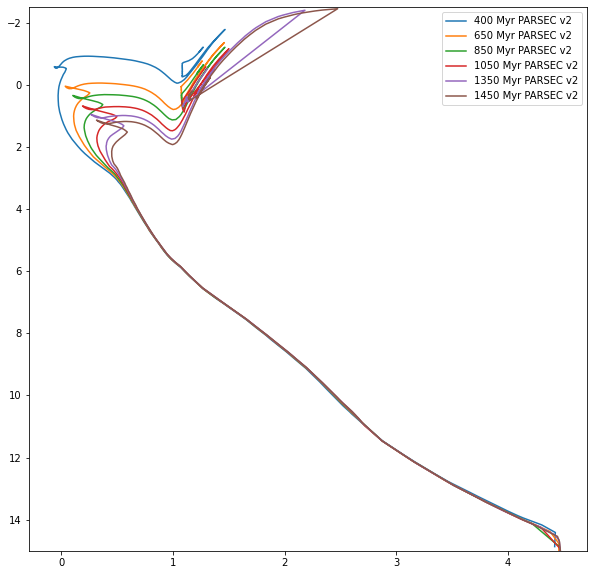

In [9]:
#get_isochrone_PARSEC_2(age, metallicity, interstellar extinction)

a = get_isochrone_PARSEC_2(400, 0, 0)
b = get_isochrone_PARSEC_2(650, 0, 0)
c = get_isochrone_PARSEC_2(850, 0, 0)
d = get_isochrone_PARSEC_2(1050, 0, 0)
e = get_isochrone_PARSEC_2(1250, 0, 0)
f = get_isochrone_PARSEC_2(1450, 0, 0)

figure, axis = plt.subplots(figsize = (10,10))
axis.plot(a['BP-RP'], a['Gmag'], label = '400 Myr PARSEC v2')
axis.plot(b['BP-RP'], b['Gmag'], label = '650 Myr PARSEC v2')
axis.plot(c['BP-RP'], c['Gmag'], label = '850 Myr PARSEC v2')
axis.plot(d['BP-RP'], d['Gmag'], label = '1050 Myr PARSEC v2')
axis.plot(e['BP-RP'], e['Gmag'], label = '1350 Myr PARSEC v2')
axis.plot(f['BP-RP'], f['Gmag'], label = '1450 Myr PARSEC v2')

axis.set_ylim(15, -2.5)
axis.legend(loc = 'upper right')

figure.show()